In [60]:
# %pip install xarray
# %pip install "xarray[io]"
# %pip install matplotlib
#%pip install python-math

In [61]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib as mpl
import math

In [62]:
data = xr.open_dataset(r'HWSD_1247/data/ROOTS.nc4')
data

<xarray.Dataset> Size: 207MB
Dimensions:  (lat: 3600, lon: 7200)
Coordinates:
  * lat      (lat) float64 29kB -89.97 -89.92 -89.88 ... 89.88 89.92 89.97
  * lon      (lon) float64 58kB -180.0 -179.9 -179.9 ... 179.9 179.9 180.0
Data variables:
    ROOTS    (lat, lon) float64 207MB ...
Attributes:
    modified:       Will Wieder Thu Sep  6 14:57:41 MDT 2012
    institution:    NCAR (National Center for Atmospheric Research, USA)
    creator:        Will Wieder
    creator_email:  wwieder@ucar.edu
    title:          3x3minute regridded HWSD - Depth class of obstacles to roots
    source:         Original data from HWSD and processed with ESRI ArcGIS 10.0
    processing:     HWSD regridded from native resolution (30 arc-second) to ...
    Conventions:    CF-1.5
    references:     FAO/IIASA/ISRIC/ISSCAS/JRC, 2012. Harmonized World Soil D...
    history:        changed missing values to -1\nFlipped lat (-90:90)

In [63]:
data['ROOTS']

<xarray.DataArray 'ROOTS' (lat: 3600, lon: 7200)> Size: 207MB
[25920000 values with dtype=float64]
Coordinates:
  * lat      (lat) float64 29kB -89.97 -89.92 -89.88 ... 89.88 89.92 89.97
  * lon      (lon) float64 58kB -180.0 -179.9 -179.9 ... 179.9 179.9 180.0
Attributes:
    long_name:      depth class of obstacles to roots
    variable:       ROOTS
    original_name:  ROOTS
    comment:        Valid class values 0 through 6, where \n 0 is no informat...

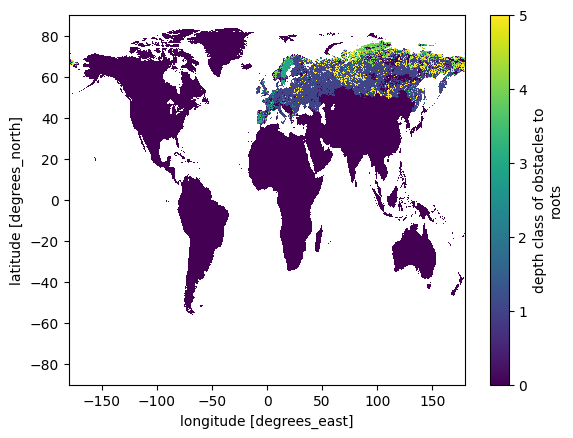

In [64]:
data['ROOTS'].plot()


In [65]:
df = data.to_dataframe().reset_index()


In [66]:
df

,lat,lon,ROOTS
0,-89.975,-179.975,NaN
1,-89.975,-179.925,NaN
2,-89.975,-179.875,NaN
3,-89.975,-179.825,NaN
4,-89.975,-179.775,NaN
...,...,...,...
25919995,89.975,179.775,NaN
25919996,89.975,179.825,NaN
25919997,89.975,179.875,NaN
25919998,89.975,179.925,NaN


In [67]:
df = df.dropna(subset=['ROOTS'])
df

,lat,lon,ROOTS
4898254,-55.975,-67.275,0.0
4905453,-55.925,-67.325,0.0
4905454,-55.925,-67.275,0.0
4905459,-55.925,-67.025,0.0
4912644,-55.875,-67.775,0.0
...,...,...,...
25001347,83.625,-32.625,0.0
25001348,83.625,-32.575,0.0
25001349,83.625,-32.525,0.0
25001350,83.625,-32.475,0.0


In [68]:
print(df.columns)

Index(['lat', 'lon', 'ROOTS'], dtype='object')


In [69]:
def custom_round(num):
    normal_rounded_num = round(num)
    if normal_rounded_num == math.ceil(num):
        return normal_rounded_num - .25
    else:
        return normal_rounded_num + .25

In [70]:
# df['lat'] = df['lat'].apply(lambda x: custom_round(x))
# df['lon'] = df['lon'].apply(lambda x: custom_round(x))

In [71]:
df

,lat,lon,ROOTS
4898254,-55.975,-67.275,0.0
4905453,-55.925,-67.325,0.0
4905454,-55.925,-67.275,0.0
4905459,-55.925,-67.025,0.0
4912644,-55.875,-67.775,0.0
...,...,...,...
25001347,83.625,-32.625,0.0
25001348,83.625,-32.575,0.0
25001349,83.625,-32.525,0.0
25001350,83.625,-32.475,0.0


In [72]:
df = df[df['ROOTS'] != 0]
df

,lat,lon,ROOTS
17982481,34.875,24.075,1.0
17982482,34.875,24.125,1.0
17989694,34.925,24.725,2.0
17989695,34.925,24.775,2.0
17989697,34.925,24.875,2.0
...,...,...,...
24449483,79.775,94.175,4.0
24449484,79.775,94.225,4.0
24449485,79.775,94.275,4.0
24449486,79.775,94.325,4.0


## TOPSOIL PH 

In [73]:
data_t_ph_h2o = xr.open_dataset(r'HWSD_1247/data/T_PH_H2O.nc4')
data_t_ph_h2o


<xarray.Dataset> Size: 207MB
Dimensions:   (lat: 3600, lon: 7200)
Coordinates:
  * lat       (lat) float64 29kB -89.97 -89.92 -89.88 ... 89.88 89.92 89.97
  * lon       (lon) float64 58kB -180.0 -179.9 -179.9 ... 179.9 179.9 180.0
Data variables:
    T_PH_H2O  (lat, lon) float64 207MB ...
Attributes:
    modified:       Will Wieder Thu Sep  6 15:01:21 MDT 2012
    institution:    NCAR (National Center for Atmospheric Research, USA)
    creator:        Will Wieder
    creator_email:  wwieder@ucar.edu
    title:          3x3minute regridded HWSD - Topsoil pH
    source:         Original data from HWSD and processed with ESRI ArcGIS 10.0
    processing:     HWSD regridded from native resolution (30 arc-second) to ...
    Conventions:    CF-1.5
    references:     FAO/IIASA/ISRIC/ISSCAS/JRC, 2012. Harmonized World Soil D...
    history:        changed missing values to -1\nFlipped lat (-90:90)

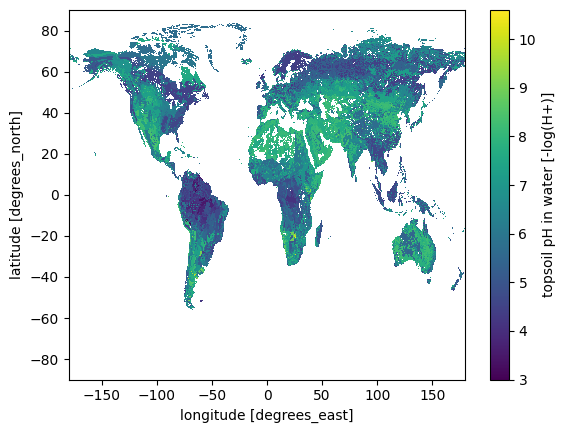

In [74]:
data_t_ph_h2o['T_PH_H2O'].plot()

In [75]:
data_t_ph_h2o = data_t_ph_h2o.to_dataframe().reset_index()

In [76]:
# data_t_ph_h2o['lat'] = data_t_ph_h2o['lat'].apply(lambda x: custom_round(x))
# data_t_ph_h2o['lon'] = data_t_ph_h2o['lon'].apply(lambda x: custom_round(x))
# data_t_ph_h2o

In [77]:
data_t_ph_h2o = data_t_ph_h2o.dropna(subset=['T_PH_H2O'])
data_t_ph_h2o

,lat,lon,T_PH_H2O
4898254,-55.975,-67.275,6.5
4905453,-55.925,-67.325,6.5
4905454,-55.925,-67.275,6.5
4905459,-55.925,-67.025,6.5
4912644,-55.875,-67.775,6.5
...,...,...,...
25001347,83.625,-32.625,5.7
25001348,83.625,-32.575,5.7
25001349,83.625,-32.525,5.7
25001350,83.625,-32.475,5.7


In [78]:
lat_min, lat_max = 42, 83  # lat canada range
lon_min, lon_max = -141, -53  # lon canada range

canada_data_t_ph_h2o = data_t_ph_h2o[(data_t_ph_h2o['lat'] >= lat_min) & (data_t_ph_h2o['lat'] <= lat_max) & (data_t_ph_h2o['lon'] >= lon_min) & (data_t_ph_h2o['lon'] <= lon_max)]
canada_data_t_ph_h2o

,lat,lon,T_PH_H2O
19009115,42.025,-124.225,5.0
19009116,42.025,-124.175,5.0
19009117,42.025,-124.125,5.0
19009118,42.025,-124.075,5.0
19009119,42.025,-124.025,5.0
...,...,...,...
24907041,82.975,-67.925,5.7
24907044,82.975,-67.775,5.7
24907045,82.975,-67.725,5.7
24907046,82.975,-67.675,5.7


## SUBSOIL PH

In [79]:
data_s_ph_h2o = xr.open_dataset(r'HWSD_1247/data/S_PH_H2O.nc4')
data_s_ph_h2o

<xarray.Dataset> Size: 207MB
Dimensions:   (lat: 3600, lon: 7200)
Coordinates:
  * lat       (lat) float64 29kB -89.97 -89.92 -89.88 ... 89.88 89.92 89.97
  * lon       (lon) float64 58kB -180.0 -179.9 -179.9 ... 179.9 179.9 180.0
Data variables:
    S_PH_H2O  (lat, lon) float64 207MB ...
Attributes:
    modified:       Will Wieder Thu Sep  6 14:58:19 MDT 2012
    institution:    NCAR (National Center for Atmospheric Research, USA)
    creator:        Will Wieder
    creator_email:  wwieder@ucar.edu
    title:          3x3minute regridded HWSD - Subsoil pH
    source:         Original data from HWSD and processed with ESRI ArcGIS 10.0
    processing:     HWSD regridded from native resolution (30 arc-second) to ...
    Conventions:    CF-1.5
    references:     FAO/IIASA/ISRIC/ISSCAS/JRC, 2012. Harmonized World Soil D...
    history:        changed missing values to -1\nFlipped lat (-90:90)

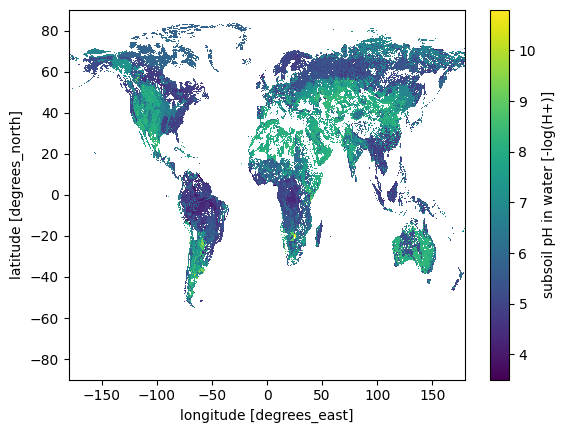

In [80]:
data_s_ph_h2o['S_PH_H2O'].plot()

In [81]:
data_s_ph_h2o = data_s_ph_h2o.to_dataframe().reset_index()

In [82]:
# data_s_ph_h2o['lat'] = data_s_ph_h2o['lat'].apply(lambda x: custom_round(x))
# data_s_ph_h2o['lon'] = data_s_ph_h2o['lon'].apply(lambda x: custom_round(x))

In [83]:
data_s_ph_h2o = data_s_ph_h2o.dropna(subset=['S_PH_H2O'])

In [84]:
lat_min, lat_max = 42, 83  # lat canada range
lon_min, lon_max = -141, -53  # lon canada range

canada_data_s_ph_h2o = data_s_ph_h2o[(data_s_ph_h2o['lat'] >= lat_min) & (data_s_ph_h2o['lat'] <= lat_max) & (data_s_ph_h2o['lon'] >= lon_min) & (data_s_ph_h2o['lon'] <= lon_max)]
canada_data_s_ph_h2o

,lat,lon,S_PH_H2O
19009115,42.025,-124.225,5.2
19009116,42.025,-124.175,5.2
19009117,42.025,-124.125,5.2
19009118,42.025,-124.075,5.2
19009119,42.025,-124.025,5.2
...,...,...,...
24907041,82.975,-67.925,5.8
24907044,82.975,-67.775,5.8
24907045,82.975,-67.725,5.8
24907046,82.975,-67.675,5.8


In [85]:
merged_ph = canada_data_t_ph_h2o.merge(canada_data_s_ph_h2o, on = ['lat','lon'])

In [86]:
merged_ph

,lat,lon,T_PH_H2O,S_PH_H2O
0,42.025,-124.225,5.0,5.2
1,42.025,-124.175,5.0,5.2
2,42.025,-124.125,5.0,5.2
3,42.025,-124.075,5.0,5.2
4,42.025,-124.025,5.0,5.2
...,...,...,...,...
667727,82.975,-67.925,5.7,5.8
667728,82.975,-67.775,5.7,5.8
667729,82.975,-67.725,5.7,5.8
667730,82.975,-67.675,5.7,5.8


## AVAILABLE WATER STORAGE CAPACITY

In [87]:
data_awc_class = xr.open_dataset(r'HWSD_1247/data/AWC_CLASS.nc4')
data_awc_class

<xarray.Dataset> Size: 207MB
Dimensions:    (lat: 3600, lon: 7200)
Coordinates:
  * lat        (lat) float64 29kB -89.97 -89.92 -89.88 ... 89.88 89.92 89.97
  * lon        (lon) float64 58kB -180.0 -179.9 -179.9 ... 179.9 179.9 180.0
Data variables:
    AWC_CLASS  (lat, lon) float64 207MB ...
Attributes:
    modified:       Will Wieder Thu Sep  6 14:57:33 MDT 2012
    institution:    NCAR (National Center for Atmospheric Research, USA)
    creator:        Will Wieder
    creator_email:  wwieder@ucar.edu
    title:          3x3minute regridded HWSD - Available water storage capacity
    source:         Original data from HWSD and processed with ESRI ArcGIS 10.0
    processing:     HWSD regridded from native resolution (30 arc-second) to ...
    Conventions:    CF-1.5
    references:     FAO/IIASA/ISRIC/ISSCAS/JRC, 2012. Harmonized World Soil D...
    history:        changed missing values to -1\nFlipped lat (-90:90)

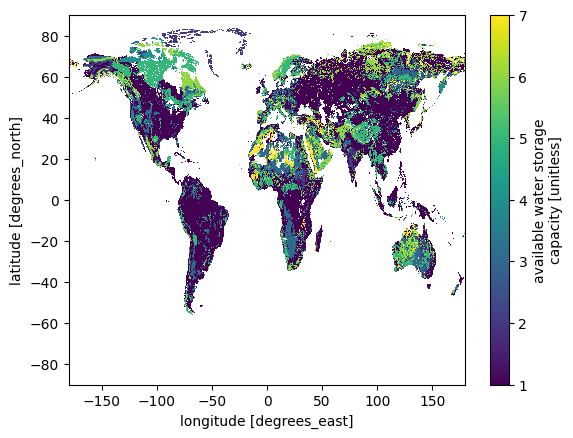

In [88]:
data_awc_class['AWC_CLASS'].plot()

In [89]:
data_awc_class = data_awc_class.to_dataframe().reset_index()
# data_awc_class['lat'] = data_awc_class['lat'].apply(lambda x: custom_round(x))
# data_awc_class['lon'] = data_awc_class['lon'].apply(lambda x: custom_round(x))

In [90]:
data_awc_class = data_awc_class.dropna(subset=['AWC_CLASS'])

In [91]:
lat_min, lat_max = 42, 83  # lat canada range
lon_min, lon_max = -141, -53  # lon canada range

canada_data_awc_class = data_awc_class[(data_awc_class['lat'] >= lat_min) & (data_awc_class['lat'] <= lat_max) & (data_awc_class['lon'] >= lon_min) & (data_s_ph_h2o['lon'] <= lon_max)]
canada_data_awc_class


/var/folders/c4/f9pfbssn3vg84j6b1kjxvdxc0000gn/T/ipykernel_4660/830253652.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  canada_data_awc_class = data_awc_class[(data_awc_class['lat'] >= lat_min) & (data_awc_class['lat'] <= lat_max) & (data_awc_class['lon'] >= lon_min) & (data_s_ph_h2o['lon'] <= lon_max)]


,lat,lon,AWC_CLASS
19009115,42.025,-124.225,1.0
19009116,42.025,-124.175,1.0
19009117,42.025,-124.125,1.0
19009118,42.025,-124.075,1.0
19009119,42.025,-124.025,1.0
...,...,...,...
24907041,82.975,-67.925,2.0
24907044,82.975,-67.775,2.0
24907045,82.975,-67.725,2.0
24907046,82.975,-67.675,2.0


In [92]:
merge_all = merged_ph.merge(canada_data_awc_class, on = ['lat','lon'])

In [93]:
merge_all

,lat,lon,T_PH_H2O,S_PH_H2O,AWC_CLASS
0,42.025,-124.225,5.0,5.2,1.0
1,42.025,-124.175,5.0,5.2,1.0
2,42.025,-124.125,5.0,5.2,1.0
3,42.025,-124.075,5.0,5.2,1.0
4,42.025,-124.025,5.0,5.2,1.0
...,...,...,...,...,...
667727,82.975,-67.925,5.7,5.8,2.0
667728,82.975,-67.775,5.7,5.8,2.0
667729,82.975,-67.725,5.7,5.8,2.0
667730,82.975,-67.675,5.7,5.8,2.0


In [95]:
merge_all.to_csv('merged_soil.csv', index=False)

In [101]:
soil_data = pd.read_csv('merged_soil.csv')

In [102]:
soil_data['lat'] = soil_data['lat'].apply(lambda x: custom_round(x))
soil_data['lon'] = soil_data['lon'].apply(lambda x: custom_round(x))

In [103]:
soil_data

,lat,lon,T_PH_H2O,S_PH_H2O,AWC_CLASS
0,42.25,-124.25,5.0,5.2,1.0
1,42.25,-124.25,5.0,5.2,1.0
2,42.25,-124.25,5.0,5.2,1.0
3,42.25,-124.25,5.0,5.2,1.0
4,42.25,-124.25,5.0,5.2,1.0
...,...,...,...,...,...
667727,82.75,-67.75,5.7,5.8,2.0
667728,82.75,-67.75,5.7,5.8,2.0
667729,82.75,-67.75,5.7,5.8,2.0
667730,82.75,-67.75,5.7,5.8,2.0


In [123]:
grouped_soil = soil_data.groupby(['lat', 'lon'], as_index=False).mean()

In [124]:
grouped_soil

,lat,lon,T_PH_H2O,S_PH_H2O,AWC_CLASS
0,42.25,-124.25,5.000000,5.200000,1.000000
1,42.25,-123.75,4.832000,5.032000,2.260000
2,42.25,-123.25,4.600000,4.800000,4.000000
3,42.25,-122.75,5.886000,6.094000,3.220000
4,42.25,-122.25,5.810309,6.181443,3.072165
...,...,...,...,...,...
8525,82.75,-64.25,5.700000,5.800000,2.000000
8526,82.75,-63.75,5.700000,5.800000,2.000000
8527,82.75,-63.25,5.700000,5.800000,2.000000
8528,82.75,-62.75,5.700000,5.800000,2.000000


In [141]:
climate_data = pd.read_csv('./dataset/canadian_yield_and_agroclimate.csv', index_col=[0])

In [142]:
climate_data

,CROP,LATITUDE,LONGITUDE,YEAR,YIELD,GSL,CWD_fall,CWD_spring,CWD_summer,WW_fall,...,CSDI_summer,WSDI_fall,WSDI_spring,WSDI_summer,CFD_fall,CFD_spring,CFD_summer,CSU_fall,CSU_spring,CSU_summer
0,barley,46.25,-62.25,1987,59.1,192.0,5.0,7.0,4.0,4.0,...,0.0,0.0,7.0,0.0,9.0,23.0,0.0,1.0,0.0,5.0
1,oats,46.25,-62.25,1987,62.1,192.0,5.0,7.0,4.0,4.0,...,0.0,0.0,7.0,0.0,9.0,23.0,0.0,1.0,0.0,5.0
2,spring_wheat,46.25,-62.25,1987,52.2,192.0,5.0,7.0,4.0,4.0,...,0.0,0.0,7.0,0.0,9.0,23.0,0.0,1.0,0.0,5.0
3,winter_wheat,46.25,-62.25,1987,52.5,192.0,5.0,7.0,4.0,4.0,...,0.0,0.0,7.0,0.0,9.0,23.0,0.0,1.0,0.0,5.0
4,barley,46.25,-63.25,1987,59.1,193.0,5.0,8.0,4.0,5.0,...,0.0,0.0,7.0,0.0,10.0,23.0,0.0,0.0,0.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12358,oats,57.25,-128.25,2010,51.1,122.0,15.0,3.0,11.0,9.0,...,0.0,0.0,0.0,0.0,51.0,59.0,4.0,0.0,0.0,2.0
12359,spring_wheat,57.25,-128.25,2010,27.2,122.0,15.0,3.0,11.0,9.0,...,0.0,0.0,0.0,0.0,51.0,59.0,4.0,0.0,0.0,2.0
12360,barley,57.75,-123.25,2010,31.3,161.0,3.0,13.0,8.0,4.0,...,0.0,7.0,0.0,0.0,35.0,43.0,1.0,1.0,0.0,2.0
12361,oats,57.75,-123.25,2010,51.3,161.0,3.0,13.0,8.0,4.0,...,0.0,7.0,0.0,0.0,35.0,43.0,1.0,1.0,0.0,2.0


In [161]:
final_merge = pd.merge(climate_data, grouped_soil, left_on= ['LATITUDE','LONGITUDE'] , right_on= ['lat', 'lon'])

In [162]:
final_merge = final_merge.drop(['lat', 'lon'], axis=1)
final_merge

,CROP,LATITUDE,LONGITUDE,YEAR,YIELD,GSL,CWD_fall,CWD_spring,CWD_summer,WW_fall,...,WSDI_summer,CFD_fall,CFD_spring,CFD_summer,CSU_fall,CSU_spring,CSU_summer,T_PH_H2O,S_PH_H2O,AWC_CLASS
0,barley,46.25,-62.25,1987,59.1,192.0,5.0,7.0,4.0,4.0,...,0.0,9.0,23.0,0.0,1.0,0.0,5.0,4.5,4.8,3.0
1,oats,46.25,-62.25,1987,62.1,192.0,5.0,7.0,4.0,4.0,...,0.0,9.0,23.0,0.0,1.0,0.0,5.0,4.5,4.8,3.0
2,spring_wheat,46.25,-62.25,1987,52.2,192.0,5.0,7.0,4.0,4.0,...,0.0,9.0,23.0,0.0,1.0,0.0,5.0,4.5,4.8,3.0
3,winter_wheat,46.25,-62.25,1987,52.5,192.0,5.0,7.0,4.0,4.0,...,0.0,9.0,23.0,0.0,1.0,0.0,5.0,4.5,4.8,3.0
4,barley,46.25,-62.25,1988,55.7,199.0,6.0,8.0,4.0,10.0,...,0.0,13.0,13.0,0.0,1.0,2.0,9.0,4.5,4.8,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12358,oats,57.75,-123.25,2009,76.0,131.0,3.0,3.0,10.0,1.0,...,0.0,27.0,53.0,1.0,0.0,0.0,3.0,6.0,6.3,1.0
12359,spring_wheat,57.75,-123.25,2009,35.7,131.0,3.0,3.0,10.0,1.0,...,0.0,27.0,53.0,1.0,0.0,0.0,3.0,6.0,6.3,1.0
12360,barley,57.75,-123.25,2010,31.3,161.0,3.0,13.0,8.0,4.0,...,0.0,35.0,43.0,1.0,1.0,0.0,2.0,6.0,6.3,1.0
12361,oats,57.75,-123.25,2010,51.3,161.0,3.0,13.0,8.0,4.0,...,0.0,35.0,43.0,1.0,1.0,0.0,2.0,6.0,6.3,1.0


In [164]:
final_merge.to_csv('climate_soil_data.csv', index=False)